In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
import skimpy

# IDÉES ETAPES À SUIVRES :
1) Exploration et préparation des données:

- Analyser les données pour comprendre leur structure.
- Nettoyer les données (traiter les valeurs manquantes, les doublons, etc.).
- Effectuer une analyse exploratoire des données (EDA).

2) Prétraitement des données:

- Normaliser ou standardiser les données.
- Encoder les variables catégorielles.
- Diviser les données en ensembles d'entraînement et de test.

3) Sélection du modèle:

- Choisir les algorithmes de machine learning appropriés.
- Entraîner plusieurs modèles pour comparer leurs performances.

4) Entraînement du modèle:

- Entraîner les modèles sur l'ensemble d'entraînement.
- Ajuster les hyperparamètres pour optimiser les performances.

5) Évaluation du modèle:

- Évaluer les modèles sur l'ensemble de test.
- Utiliser des métriques de performance appropriées (précision, rappel, F1-score, etc.).


In [70]:
train_df = pd.read_csv('classification-multi-classes/train.csv', 
                      delimiter = ",",
                      header = 0)

train_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1055.0,NaN,19724.0,F,NaN,NaN,NaN,N,1.3,NaN,3.64,NaN,NaN,NaN,NaN,209.0,10.5,3.0,C
1,1,3282.0,Placebo,17884.0,F,N,Y,Y,N,0.7,309.0,3.60,96.0,1142.0,71.3,106.0,240.0,12.4,4.0,C
2,2,1653.0,NaN,20600.0,F,NaN,NaN,NaN,N,2.2,NaN,3.64,NaN,NaN,NaN,NaN,139.0,9.5,2.0,C
3,3,999.0,D-penicillamine,22514.0,F,N,Y,N,N,1.0,498.0,3.35,89.0,1601.0,164.3,85.0,394.0,9.7,3.0,C
4,4,2202.0,NaN,17897.0,F,NaN,NaN,NaN,N,17.2,NaN,3.15,NaN,NaN,NaN,NaN,432.0,11.2,3.0,C


In [71]:
train_df.shape

(15000, 20)

## <span style="color:red">1.  Exploration et préparation des données</span>

- id : Identifiant unique de chaque patient ou enregistrement. 
- N_Days : Nombre de jours écoulés depuis un événement de référence (par exemple, diagnostic, début du suivi, ou début du traitement). Début du traitement 1986.
- Drug : Nom ou catégorie du médicament administré au patient.
- Age : Âge du patient (probablement en années).
- Sex : Sexe du patient (Male ou Female).
- Ascites : Présence d’ascite (accumulation de liquide dans la cavité abdominale). Valeurs possibles : Yes, No, ou NA (inconnue).
- Hepatomegaly : Présence d’hépatomégalie (augmentation du volume du foie). Valeurs possibles : Yes, No, ou NA.
- Spiders : Présence de telangiectasies en araignée (lésions vasculaires cutanées). Valeurs possibles : Yes, No, ou NA.
- Edema : Présence d’œdème. Peut inclure des catégories comme None, Slight, ou Marked.
- Bilirubin : Niveau de bilirubine dans le sang (en mg/dL), un marqueur de la fonction hépatique.
- Cholesterol : Niveau de cholestérol dans le sang (en mg/dL), souvent indicatif d’une santé globale ou de troubles métaboliques.
- Albumin : Niveau d’albumine dans le sang (en g/dL), un marqueur nutritionnel et de la fonction hépatique.
- Copper : Concentration de cuivre dans le sang ou l’urine (en µg/dL), indicateur d’une éventuelle maladie de Wilson ou autre désordre métabolique.
- Alk_Phos : Niveau de phosphatases alcalines (en UI/L), un indicateur de fonction hépatique ou osseuse.
- SGOT : Niveau d'enzymes transaminases (SGOT ou AST) (en UI/L), indicateur de dommages au foie ou à d’autres organes.
- Tryglicerides : Niveau de triglycérides dans le sang (en mg/dL), un marqueur lipidique et métabolique.
- Platelets : Nombre de plaquettes dans le sang (en milliers/μL), un indicateur de la coagulation.
- Prothrombin : Temps de prothrombine (en secondes ou % d’activité), un test de coagulation pour évaluer la fonction hépatique.
- Stage : Stade de la maladie, basé sur un système de classification (souvent de 1 à 4, où 4 est le plus sévère).
- Status : État ou issue du patient. Par exemple : Alive, Deceased, ou autres catégories. (VARIABLE CYBLE)

### <span style="color:blue">Types des variables</span>

In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8564 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8563 non-null   object 
 6   Hepatomegaly   8564 non-null   object 
 7   Spiders        8555 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6669 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8452 non-null   float64
 13  Alk_Phos       8558 non-null   float64
 14  SGOT           8555 non-null   float64
 15  Tryglicerides  6630 non-null   float64
 16  Platelets      14414 non-null  float64
 17  Prothrombin    14974 non-null  float64
 18  Stage 

In [73]:
# Mettre N_Days en int
train_df['N_Days'] = train_df['N_Days'].astype('int')

# stage mettre en int
train_df['Stage'] = train_df['Stage'].astype('object')

In [74]:
train_df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,15000.000000,15000.000000,15000.000000,15000.000000,6669.000000,15000.000000,8452.000000,8558.000000,8555.000000,6630.000000,14414.000000,14974.000000
mean,7499.500000,1966.998733,19248.502373,1.861462,327.670115,3.525314,74.715689,1667.605282,106.579545,110.297097,253.822027,10.627748
std,4330.271354,1355.897299,3697.546749,2.752375,179.801705,0.369981,74.211915,1861.746315,56.493338,49.676146,94.074989,0.741888
min,0.000000,3.000000,133.300000,0.300000,120.000000,1.800000,4.000000,16.000000,8.000000,33.000000,0.400000,7.100000
25%,3749.750000,1092.000000,16374.000000,0.600000,242.000000,3.290000,31.000000,721.000000,71.000000,80.000000,183.000000,10.100000
50%,7499.500000,1785.000000,19544.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,251.000000,10.600000
75%,11249.250000,2635.000000,22369.000000,1.800000,360.000000,3.770000,86.000000,1691.250000,133.300000,133.000000,312.000000,11.000000
max,14999.000000,40795.000000,35472.000000,28.000000,1790.000000,4.640000,588.000000,19270.000000,2148.000000,598.000000,724.000000,18.000000


### <span style="color:blue">Valeurs manquantes</span>

In [75]:
# Valeur manquante
train_df.isna().sum()/len(train_df)*100

id                0.000000
N_Days            0.000000
Drug             42.906667
Age               0.000000
Sex               0.000000
Ascites          42.913333
Hepatomegaly     42.906667
Spiders          42.966667
Edema             0.000000
Bilirubin         0.000000
Cholesterol      55.540000
Albumin           0.000000
Copper           43.653333
Alk_Phos         42.946667
SGOT             42.966667
Tryglicerides    55.800000
Platelets         3.906667
Prothrombin       0.173333
Stage             0.000000
Status            0.000000
dtype: float64

In [76]:
# On constate que les pourcentages de valeurs manquantes sont assez proches pour certaines variables:
# - Ascites, Hepatomegaly, Spiders ont un pourcentage de valeurs manquantes quasiment égal
#   De plus, ces trois variables ont la meme structure (yes/no/na)
#   -> il est possible que ce soit les mêmes individus pour lesquels on a des NA (personnes qui n'ont juste 
#   pas repondus ou pas suivi le protocole)
# - Cholesterol, Tryglicerides ont des pourcentages de valeurs manquantes plus élevés que les autre variables
#   -> il s'agirait des meme individus qui n'ont pas suivi le traitement + des individus qui ne connaitraient
#    pas ces taux 

# => en generale les pourcenatge de valeur manquantes sur des variables qui semblent liées entre elles
# => il est possible que ce soit les mêmes individus pour lesquels on a des NA, donc un groupe qui n'aurait 
# pas suivi le protocole 
# IL FAUDRA FAIRE UNE ANALYSE PLUS POUSSEE POUR VOIR SI LES NA SONT PReSENTS SUR LES MEMES INDIVIDUS

## <span style="color:blue">Analyse détaillée de chaques variables et prétraitement</span>

* ID :

In [77]:
# supprimer id
train_df.drop(columns='id',inplace = True)

* N_Days :

In [78]:
train_df['N_Days'].dtype

dtype('int64')

In [79]:
train_df['N_Days'].describe()
# max abbberant regarder

count    15000.000000
mean      1966.998733
std       1355.897299
min          3.000000
25%       1092.000000
50%       1785.000000
75%       2635.000000
max      40795.000000
Name: N_Days, dtype: float64

In [80]:
print(train_df['N_Days'].max()/365)
# Correspondant en années à 111 ans envirront
# Problèmes sur cette valeur (traitement ne peut durer autant de temps)
# De plus, d'apres les recherhes le dataset debute en 1986.
# -> impossible d'avoir des N_days supérieur à :
print((2025-1986)*365)

111.76712328767124
14235


(array([8.620e+02, 1.483e+03, 2.395e+03, 2.037e+03, 1.378e+03, 1.994e+03,
        1.966e+03, 1.035e+03, 8.100e+02, 4.450e+02, 4.330e+02, 1.350e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

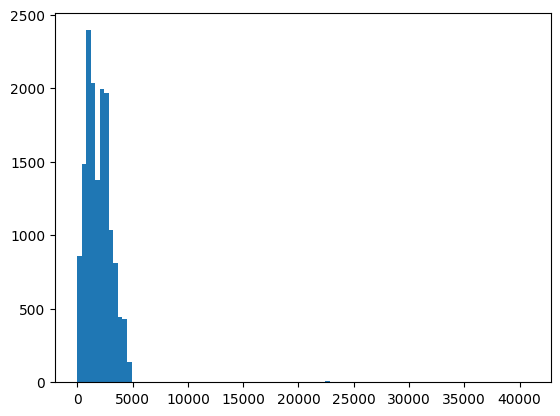

In [81]:
plt.hist(train_df['N_Days'], bins = 100)

{'whiskers': [<matplotlib.lines.Line2D at 0x121c329d0>,
 'caps': [<matplotlib.lines.Line2D at 0x121c33cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x121c13950>],
 'medians': [<matplotlib.lines.Line2D at 0x121c40e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x121c41750>],
 'means': []}

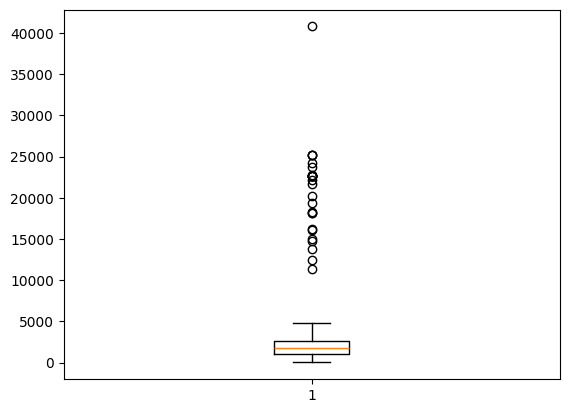

In [82]:
plt.boxplot(train_df['N_Days'])

* Drug : 

In [83]:
train_df['Drug'].describe()

count                8564
unique                  2
top       D-penicillamine
freq                 4568
Name: Drug, dtype: object

In [84]:
train_df['Drug'].value_counts(dropna=False, normalize=True)
# Autant de placebo que de cachets
# Beaucoup de variables manquantes
# Faut il :
# - considérer les NaN comme des valeurs manquantes
# - mettre les NaN en "non-suivi" -> personnes qui n'auraient simplement pas suivi le traitement

Drug
NaN                0.429067
D-penicillamine    0.304533
Placebo            0.266400
Name: proportion, dtype: float64

In [85]:
# Si on recode les NaN en "non-suivi" :
# train_df['Drug'] = train_df['Drug'].fillna('non-suivi').astype(str)


In [86]:
from collections import Counter
frequencies = Counter(train_df['Drug'])
frequencies

Counter({nan: 6436, 'D-penicillamine': 4568, 'Placebo': 3996})

In [87]:
labels = list(frequencies.keys())
values = list(frequencies.values()) 

<BarContainer object of 2 artists>

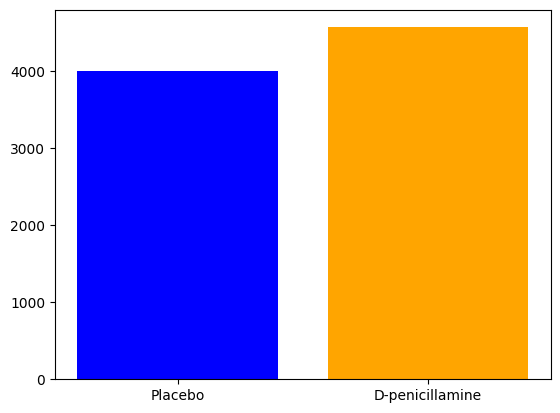

In [88]:
plt.bar(labels[1:], values[1:], color=['blue', 'orange'])

* Age : 

In [89]:
train_df['Age'].describe()
# valeur minimale extremement petite
# on constate que le max de N_days est suppérieur à l'age max ce qui pose problème

count    15000.000000
mean     19248.502373
std       3697.546749
min        133.300000
25%      16374.000000
50%      19544.000000
75%      22369.000000
max      35472.000000
Name: Age, dtype: float64

In [90]:
train_df[train_df['Age']<train_df['N_Days']]
# problème à ce niveau car il est impossible d'avoir un age inferieur au nombre de jour de traitement
# on constate que ce problème est lié aux valeurs(abberantes) minimales
# les supprimer

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
1263,2995,Placebo,2990.0,F,N,N,N,N,0.9,314.0,3.48,18.0,1164.0,71.00,260.0,340.0,10.0,2.0,C
4216,2504,D-penicillamine,133.3,F,N,N,N,N,2.1,NaN,3.00,24.0,1828.0,133.30,NaN,474.0,10.1,3.0,C
5860,3445,D-penicillamine,133.3,F,N,Y,N,N,2.3,NaN,3.61,39.0,1828.0,133.30,NaN,123.0,10.3,4.0,D
14686,13728,Placebo,13727.0,F,Y,Y,N,Y,12.2,373.0,2.94,150.0,1029.0,119.35,151.0,399.0,11.6,4.0,D
14692,40795,D-penicillamine,17874.0,F,N,N,Y,N,1.4,486.0,3.45,32.0,2201.0,117.80,70.0,410.0,11.7,3.0,C


In [91]:
train_df.drop(train_df[train_df['Age'] < train_df['N_Days']].index, inplace=True)

In [92]:
train_df[train_df['Age']<train_df['N_Days']]

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status


In [93]:
# probleme avec age qui est en jour
train_df['Age'] = round(train_df['Age'] / 365, 0)

In [94]:
train_df['Age'].describe()

count    14995.000000
mean        52.733378
std         10.078603
min          3.000000
25%         45.000000
50%         54.000000
75%         61.000000
max         97.000000
Name: Age, dtype: float64

In [136]:
train_df['N_Days'].describe()

count    14995.000000
mean      1963.422074
std       1314.933251
min          3.000000
25%       1092.000000
50%       1785.000000
75%       2635.000000
max      25202.000000
Name: N_Days, dtype: float64

In [95]:
# age mettre en int
train_df['Age'] = train_df['Age'].astype('int')

(array([4.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+01, 1.080e+02, 4.780e+02, 7.030e+02, 7.130e+02,
        1.105e+03, 1.159e+03, 1.190e+03, 1.966e+03, 2.038e+03, 1.179e+03,
        1.334e+03, 1.613e+03, 7.300e+02, 5.230e+02, 1.120e+02, 1.400e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 3.        ,  6.13333333,  9.26666667, 12.4       , 15.53333333,
        18.66666667, 21.8       , 24.93333333, 28.06666667, 31.2       ,
        34.33333333, 37.46666667, 40.6       , 43.73333333, 46.86666667,
        50.        , 53.13333333, 56.26666667, 59.4       , 62.53333333,
        65.66666667, 68.8       , 71.93333333, 75.06666667, 78.2       ,
        81.33333333, 84.46666667, 87.6       , 90.73333333, 93.86666667,
        97.        ]),
 <BarContainer object of 30 artists>)

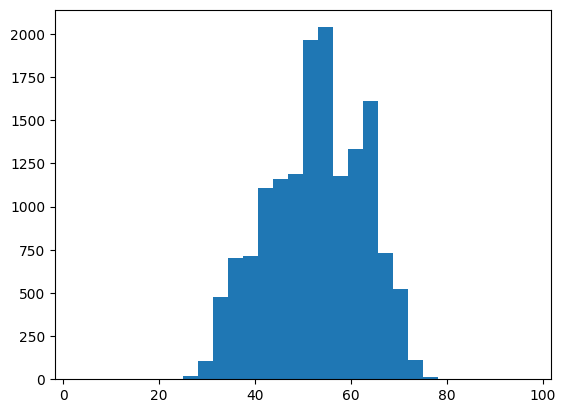

In [96]:
plt.hist(train_df['Age'], bins=30)

{'whiskers': [<matplotlib.lines.Line2D at 0x121d9ff10>,
 'caps': [<matplotlib.lines.Line2D at 0x121da9290>,
 'boxes': [<matplotlib.lines.Line2D at 0x121d7b3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x121daa490>],
 'fliers': [<matplotlib.lines.Line2D at 0x121daac90>],
 'means': []}

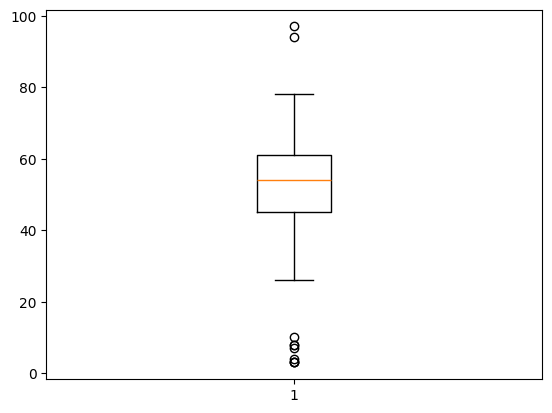

In [97]:
plt.boxplot(train_df['Age'])

In [98]:
# On remarque toujours la présence de valeurs très petites pour l'âge
# possible que l'étude ait été faite sur des enfants mais se renseigner quand meme 

In [99]:
train_df['Age'].min()
# 3 ans est ce un age convenable ou trop jeune ?

np.int64(3)

* Sex :

In [100]:
train_df['Sex'].describe()


count     14995
unique        2
top           F
freq      14398
Name: Sex, dtype: object

In [101]:
train_df['Sex'].value_counts(dropna=False, normalize=True) 
# Prendre en compte dans l'analyse que 97% des individus sont des femmes 

Sex
F    0.960187
M    0.039813
Name: proportion, dtype: float64

* Ascites : Présence d’ascite (accumulation de liquide dans la cavité abdominale). Valeurs possibles : Yes, No, ou NA (inconnue).

In [102]:
train_df['Ascites'].describe()

count     8558
unique       4
top          N
freq      8174
Name: Ascites, dtype: object

In [103]:
train_df['Ascites'].value_counts(dropna=False, normalize=True)

Ascites
N                  0.545115
NaN                0.429276
Y                  0.025475
S                  0.000067
D-penicillamine    0.000067
Name: proportion, dtype: float64

In [104]:
# parfois on a des cases vides, ou des cases avec 'NA', 'None', 'nan' mais Python les détecte 
# pas toujours de la même façon
# je fais la somme des NA et des colonnes non nulles pour m'en assurer
def case_vide (var):
    print("NA : ", train_df[var].isna().sum())
    print("Notnull : ", train_df[var].notnull().sum())
    print("vide : ", len (train_df) - (train_df[var].isna().sum() + train_df[var].notnull().sum()))

case_vide('Ascites')

NA :  6437
Notnull :  8558
vide :  0


In [139]:
# regarder les valeurs où on a la modalité S et D-penicillamine:
train_df[(train_df['Ascites'] =="S")|(train_df['Ascites'] =="D-penicillamine")]


,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status


In [138]:
train_df = train_df[~((train_df['Ascites'] == "S") | (train_df['Ascites'] == "D-penicillamine"))]

* **Cholesterol** : 

est une substance grasse (lipide) essentielle au bon fonctionnement de l'organisme. Il est impliqué dans la production des hormones, la fabrication des membranes cellulaires et la synthèse de la vitamine D. On distingue deux types principaux :

- Le cholestérol LDL ("mauvais cholestérol") : en excès, il peut s'accumuler dans les parois des artères et favoriser les maladies cardiovasculaires.

- Le cholestérol HDL ("bon cholestérol") : il aide à éliminer l'excès de cholestérol LDL en le transportant vers le foie pour être éliminé.

Mesures du cholestérol selon le risque cardiovasculaire :

Les seuils de cholestérol recommandés varient en fonction du niveau de risque cardiovasculaire (évalué par des facteurs comme l'âge, le tabagisme, l'hypertension, le diabète, ou des antécédents familiaux). Voici les objectifs selon le risque :

- Risque faible ou modéré :\
Cholestérol LDL : < 3 g/L (ou 1,15 mmol/L). \
HDL : > 0,4 g/L (ou 1 mmol/L). \
Cholestérol total : < 5 g/L (ou 1,93 mmol/L).

- Risque élevé (par exemple, si diabète ou maladie cardiovasculaire légère) :\
LDL : < 2,6 g/L (ou 1 mmol/L).

- Risque très élevé (antécédents de maladie cardiovasculaire grave ou facteurs multiples) :\
LDL : < 1,8 g/L (ou 0,7 mmol/L).

Prévention et traitement :
- Mode de vie : alimentation équilibrée (pauvre en graisses saturées, riche en fibres), activité physique régulière, arrêt du tabac.
- Traitements médicaux : si nécessaire, les statines ou autres médicaments hypolipémiants peuvent être prescrits pour atteindre les objectifs.
Une consultation médicale régulière est essentielle pour évaluer le risque et ajuster le suivi.

In [109]:
train_df['Cholesterol'].info()

<class 'pandas.core.series.Series'>
Index: 14995 entries, 0 to 14999
Series name: Cholesterol
Non-Null Count  Dtype  
--------------  -----  
6666 non-null   float64
dtypes: float64(1)
memory usage: 234.3 KB


In [110]:
# Calcul des statistiques basiques. On se rend compte que c'est en dg/dl. 
train_df['Cholesterol'].describe()

count    6666.000000
mean      327.641614
std       179.830771
min       120.000000
25%       242.000000
50%       280.000000
75%       360.000000
max      1790.000000
Name: Cholesterol, dtype: float64

In [111]:
# Passage de dg/dL --> g/L
train_df['Cholesterol'] = train_df['Cholesterol']/100

In [112]:
train_df['Cholesterol'].describe()

count    6666.000000
mean        3.276416
std         1.798308
min         1.200000
25%         2.420000
50%         2.800000
75%         3.600000
max        17.900000
Name: Cholesterol, dtype: float64

In [113]:
# Présence importante de valeurs manquantes (55% cf. Statistiques descriptives générales).
int(train_df['Cholesterol'].isna().count())

14995

(array([3539., 2396.,  480.,   91.,   49.,   29.,   25.,    7.,   15.,
          35.]),
 array([ 1.2 ,  2.87,  4.54,  6.21,  7.88,  9.55, 11.22, 12.89, 14.56,
        16.23, 17.9 ]),
 <BarContainer object of 10 artists>)

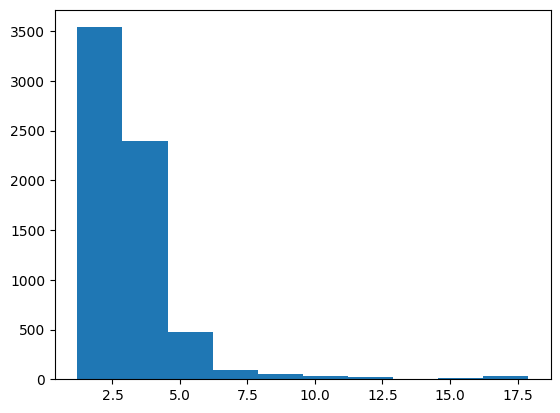

In [114]:
plt.hist(train_df['Cholesterol'].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x121e46290>,
 'caps': [<matplotlib.lines.Line2D at 0x121e47650>,
 'boxes': [<matplotlib.lines.Line2D at 0x121e3bd90>],
 'medians': [<matplotlib.lines.Line2D at 0x121e58690>],
 'fliers': [<matplotlib.lines.Line2D at 0x121e591d0>],
 'means': []}

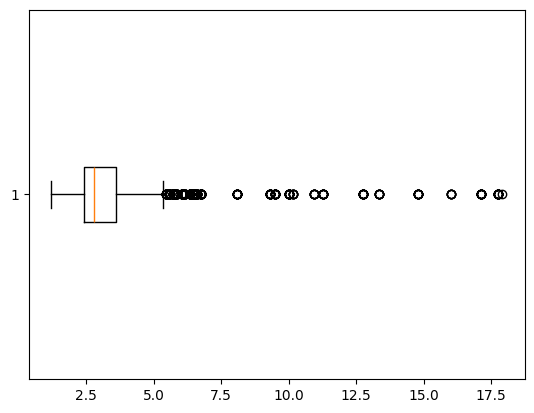

In [115]:
plt.boxplot(train_df['Cholesterol'].dropna(), orientation= 'horizontal')

In [116]:
cholesterol_zeros = train_df[train_df['Cholesterol'].isnull()]

In [117]:
cholesterol_zeros.count()

N_Days           8329
Drug             1894
Age              8329
Sex              8329
Ascites          1893
Hepatomegaly     1894
Spiders          1885
Edema            8329
Bilirubin        8329
Cholesterol         0
Albumin          8329
Copper           1839
Alk_Phos         1888
SGOT             1885
Tryglicerides       6
Platelets        7972
Prothrombin      8303
Stage            8329
Status           8329
dtype: int64

* **Albumin** :

est une protéine produite principalement par le foie. Elle joue un rôle crucial dans le maintien de la pression osmotique (qui empêche les fluides de s'échapper des vaisseaux sanguins), le transport de nombreuses substances (hormones, médicaments, acides gras, etc.) et le bon fonctionnement général du métabolisme.


Mesures de l'albumine selon le risque :

Le taux d'albumine est évalué par des analyses de sang ou d'urine. Les valeurs normales varient légèrement selon les laboratoires, mais les moyennes sont :

Albumine sérique (dans le sang) : \
- Normale : 35 à 50 g/L (3,5 à 5 g/dL). \
- Faible albumine (hypoalbuminémie) : < 35 g/L. Cela peut indiquer des maladies du foie, des reins, une malnutrition ou des inflammations chroniques. \
- Albumine élevée (hyperalbuminémie) : Rare et souvent liée à une déshydratation.

Albuminurie (albumine dans les urines) :\
- Normale : < 30 mg/24h.\
- Microalbuminurie (léger excès, signe de risque rénal) : 30-300 mg/24h.\
- Macroalbuminurie (excès important, souvent associé à une maladie rénale avancée) : > 300 mg/24h.

Risques associés aux variations de l'albumine :

Hypoalbuminémie : Peut indiquer des problèmes tels que : \
- Insuffisance hépatique (cirrhose, hépatite).\
- Maladies rénales (syndrome néphrotique).\
- Malnutrition ou carences sévères.\
- Inflammations chroniques ou cancers.

Microalbuminurie : Fréquemment un marqueur précoce de maladies rénales ou d’un risque accru de maladies cardiovasculaires, notamment chez les diabétiques ou hypertendus.

In [118]:
train_df['Albumin'].info()

<class 'pandas.core.series.Series'>
Index: 14995 entries, 0 to 14999
Series name: Albumin
Non-Null Count  Dtype  
--------------  -----  
14995 non-null  float64
dtypes: float64(1)
memory usage: 234.3 KB


In [119]:
# Mesure en g/L
train_df['Albumin'].describe()

count    14995.000000
mean         3.525390
std          0.369986
min          1.800000
25%          3.290000
50%          3.580000
75%          3.770000
max          4.640000
Name: Albumin, dtype: float64

(array([4.000e+00, 7.000e+01, 1.920e+02, 4.090e+02, 2.473e+03, 3.735e+03,
        4.513e+03, 2.755e+03, 6.130e+02, 2.310e+02]),
 array([1.8  , 2.084, 2.368, 2.652, 2.936, 3.22 , 3.504, 3.788, 4.072,
        4.356, 4.64 ]),
 <BarContainer object of 10 artists>)

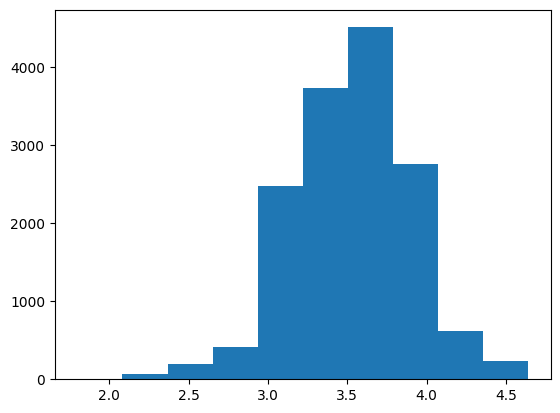

In [120]:
plt.hist(train_df['Albumin'])

{'whiskers': [<matplotlib.lines.Line2D at 0x121f151d0>,
 'caps': [<matplotlib.lines.Line2D at 0x121f21bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x121f20450>],
 'medians': [<matplotlib.lines.Line2D at 0x121f23190>],
 'fliers': [<matplotlib.lines.Line2D at 0x121f23c10>],
 'means': []}

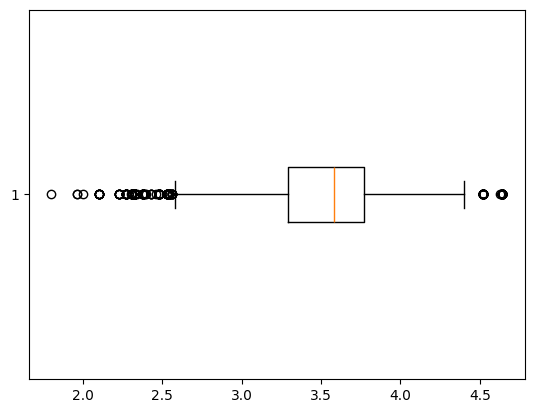

In [121]:
plt.boxplot(train_df['Albumin'], orientation='horizontal')

* **Copper** :
est un oligo-élément essentiel présent en petite quantité dans l'organisme. Il joue un rôle clé dans de nombreux processus biologiques, tels que :

- La production d'énergie (fonctionnement des enzymes).
- La formation des globules rouges et la régulation du système immunitaire.
- La synthèse du collagène et l'entretien des os, des nerfs et des tissus conjonctifs.
- Le cuivre est principalement absorbé par l'alimentation et stocké dans le foie.

Mesures du cuivre selon le risque :

Le taux de cuivre est mesuré dans le sang (cuivre sérique) ou dans l'urine (cuivre urinaire). Les valeurs normales dépendent des laboratoires, mais les moyennes sont :

Cuivre sérique (sanguin) :\
- Normale : 70 à 140 µg/dL (11 à 22 µmol/L).\
- Cuivre élevé : Peut indiquer des maladies comme la maladie de Wilson, des intoxications ou des désordres métaboliques.\
- Cuivre bas : Peut être lié à des carences nutritionnelles, des maladies intestinales (malabsorption) ou des troubles génétiques.\

Cuivre urinaire :\
- Utilisé pour détecter des excès ou surveiller la maladie de Wilson.\
- Normale : < 40 µg/24 heures.\
- Élevé : > 100 µg/24 heures, souvent associé à une surcharge de cuivre.

Risques liés aux variations de cuivre : 

Excès de cuivre (hypercuprémie) :

- Causes : intoxication au cuivre, maladie de Wilson (trouble génétique causant une accumulation toxique de cuivre dans le foie, le cerveau et les organes).
- Symptômes : fatigue, douleurs abdominales, jaunisse, troubles neurologiques.

Carence en cuivre (hypocuprémie) :

- Causes : malnutrition, malabsorption (ex. : maladie cœliaque, chirurgie intestinale), ou troubles génétiques.
- Symptômes : anémie, faiblesse, troubles neurologiques, fragilité osseuse.

In [122]:
train_df['Copper'].info()

<class 'pandas.core.series.Series'>
Index: 14995 entries, 0 to 14999
Series name: Copper
Non-Null Count  Dtype  
--------------  -----  
8447 non-null   float64
dtypes: float64(1)
memory usage: 234.3 KB


In [123]:
# Les mesures semblent être en µg/dL.
train_df['Copper'].describe()

count    8447.000000
mean       74.728779
std        74.222268
min         4.000000
25%        31.000000
50%        52.000000
75%        86.000000
max       588.000000
Name: Copper, dtype: float64

In [124]:
# Présence importante des NA. 
int(train_df['Copper'].isna().sum())

6548

(array([4976., 2035.,  780.,  418.,  111.,    6.,   29.,   54.,    0.,
          38.]),
 array([  4. ,  62.4, 120.8, 179.2, 237.6, 296. , 354.4, 412.8, 471.2,
        529.6, 588. ]),
 <BarContainer object of 10 artists>)

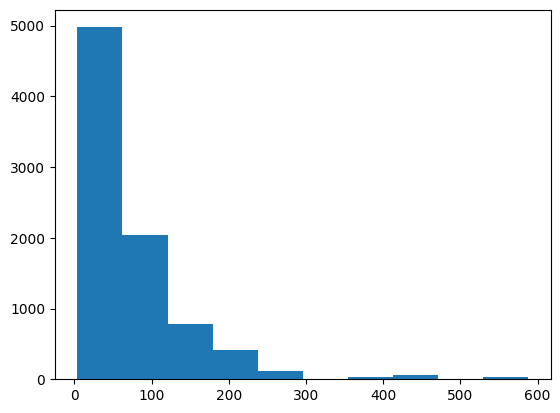

In [125]:
plt.hist(train_df['Copper'].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x121ffded0>,
 'caps': [<matplotlib.lines.Line2D at 0x121fff250>,
 'boxes': [<matplotlib.lines.Line2D at 0x121ffd5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x122008a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1220094d0>],
 'means': []}

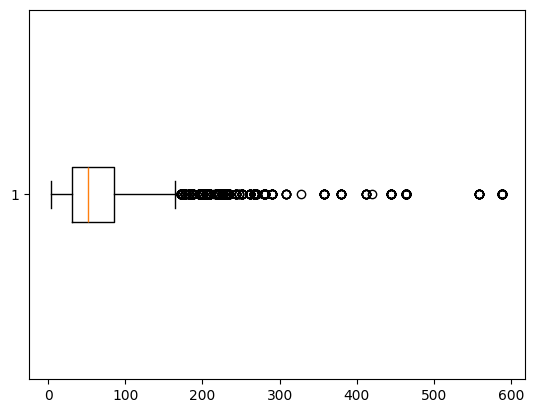

In [126]:
plt.boxplot(train_df['Copper'].dropna(), orientation ='horizontal')

* **Alk_phos** : 

sont des enzymes présentes dans plusieurs tissus de l’organisme, principalement dans le foie, les os, les reins et la bile. Elles jouent un rôle essentiel dans le métabolisme, en aidant à décomposer les protéines. Le dosage de l’ALP dans le sang est utilisé pour évaluer la santé du foie et des os.

Mesures des phosphatases alcalines selon le risque : 

Les valeurs normales peuvent varier selon les laboratoires, mais les moyennes sont :

Normale : 30 à 120 U/L (unités par litre).

ALP élevée (hyperphosphatasémie) :

Des niveaux élevés peuvent indiquer :

Affections hépatiques :
- Cholestase (obstruction des voies biliaires).
- Hépatite ou cirrhose.

Maladies osseuses :
- Maladie de Paget.
- Fractures en guérison.
- Métastases osseuses.

Autres causes : grossesse, maladies inflammatoires ou certains cancers.

ALP basse (hypophosphatasémie) :

Des niveaux faibles peuvent indiquer :

- Déficit nutritionnel : carence en zinc ou en magnésium.\
- Hypophosphatasie : une maladie génétique rare affectant le métabolisme osseux.\
- Troubles endocriniens : hypothyroïdie.


In [127]:
train_df['Alk_Phos'].info()

<class 'pandas.core.series.Series'>
Index: 14995 entries, 0 to 14999
Series name: Alk_Phos
Non-Null Count  Dtype  
--------------  -----  
8553 non-null   float64
dtypes: float64(1)
memory usage: 234.3 KB


In [128]:
train_df['Alk_Phos'].describe()

count     8553.000000
mean      1667.638957
std       1862.259165
min         16.000000
25%        721.000000
50%       1072.000000
75%       1689.000000
max      19270.000000
Name: Alk_Phos, dtype: float64

In [129]:
int(train_df['Alk_Phos'].isna().sum())

6442

{'whiskers': [<matplotlib.lines.Line2D at 0x12205ddd0>,
 'caps': [<matplotlib.lines.Line2D at 0x12205f590>,
 'boxes': [<matplotlib.lines.Line2D at 0x12205d2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x122064b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x122065750>],
 'means': []}

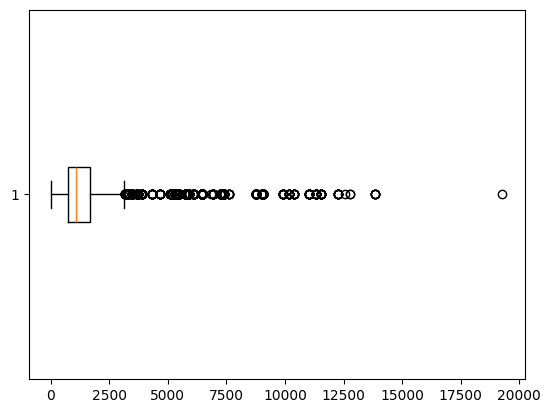

In [130]:
plt.boxplot(train_df['Alk_Phos'].dropna(),orientation='horizontal')

(array([7.057e+03, 8.010e+02, 1.840e+02, 2.880e+02, 1.340e+02, 7.300e+01,
        1.000e+01, 5.000e+00, 0.000e+00, 1.000e+00]),
 array([1.60000e+01, 1.94140e+03, 3.86680e+03, 5.79220e+03, 7.71760e+03,
        9.64300e+03, 1.15684e+04, 1.34938e+04, 1.54192e+04, 1.73446e+04,
        1.92700e+04]),
 <BarContainer object of 10 artists>)

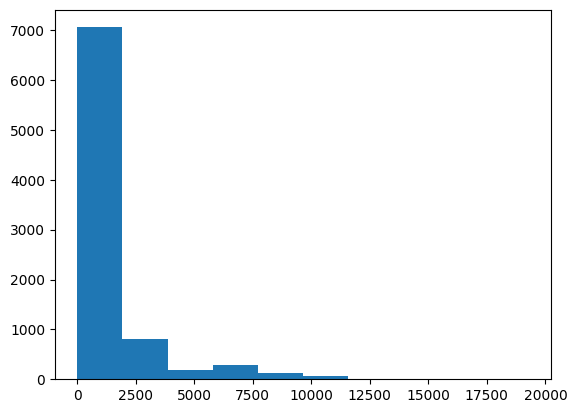

In [131]:
plt.hist(train_df['Alk_Phos'].dropna())

* **SGOT** : 

est une enzyme présente principalement dans le foie, les muscles, le cœur et les reins. Elle intervient dans le métabolisme des acides aminés. Son dosage dans le sang est utilisé pour évaluer la santé du foie et détecter d’éventuels dommages aux tissus musculaires ou cardiaques.

Mesures du SGOT selon le risque :

Les valeurs normales varient selon les laboratoires, mais généralement :

Normale : 5 à 40 U/L (unités par litre).

SGOT élevé (augmentation de l'AST) :

Des niveaux élevés peuvent indiquer :

Affections hépatiques :

- Hépatite aiguë ou chronique.
- Cirrhose ou stéatose hépatique (foie gras).
- Dommages liés à l'alcool ou aux médicaments.

Problèmes cardiaques :

Infarctus du myocarde (crise cardiaque).

Dommages musculaires :

- Myopathies ou blessures musculaires.

Autres causes : maladies métaboliques, pancréatite, hémolyse.

SGOT bas :

Un SGOT faible est rarement préoccupant mais peut être observé en cas de carence en vitamine B6.

In [132]:
train_df['SGOT'].info()

<class 'pandas.core.series.Series'>
Index: 14995 entries, 0 to 14999
Series name: SGOT
Non-Null Count  Dtype  
--------------  -----  
8550 non-null   float64
dtypes: float64(1)
memory usage: 234.3 KB


In [133]:
# Verifier les unités de mesure. 
train_df['SGOT'].describe()

count    8550.000000
mean      106.574650
std        56.506768
min         8.000000
25%        71.000000
50%        97.650000
75%       133.300000
max      2148.000000
Name: SGOT, dtype: float64

(array([8.369e+03, 1.580e+02, 2.100e+01, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   8.,  222.,  436.,  650.,  864., 1078., 1292., 1506., 1720.,
        1934., 2148.]),
 <BarContainer object of 10 artists>)

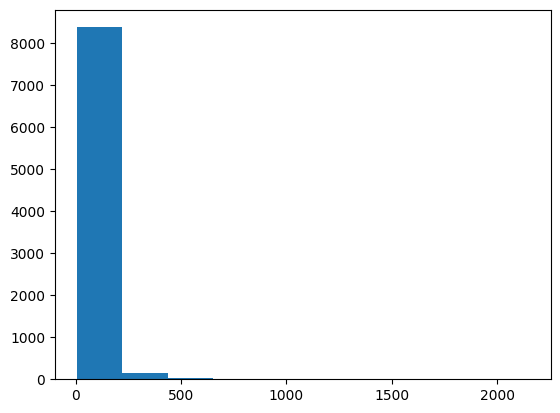

In [134]:
plt.hist(train_df['SGOT'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1221d3210>,
 'caps': [<matplotlib.lines.Line2D at 0x1221e04d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1221d2850>],
 'medians': [<matplotlib.lines.Line2D at 0x1221e1c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1221e2790>],
 'means': []}

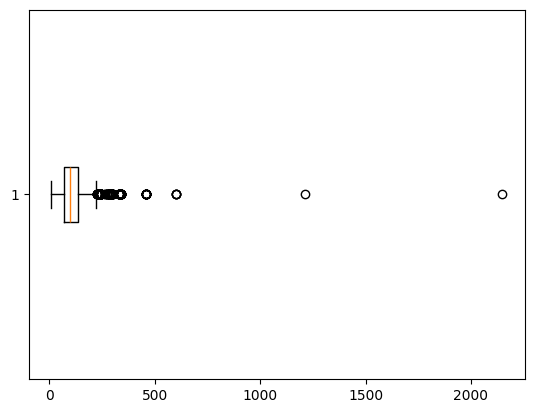

In [135]:
plt.boxplot(train_df['SGOT'].dropna(), orientation= 'horizontal')

* Stage : 

In [ ]:
train_df['Stage'].value_counts()

Stage
3    5642
4    5237
2    3379
1     737
Name: count, dtype: int64

* Status

In [ ]:
# visualisation de la variable cible :
train_df['Status'].value_counts()
# les classes sont déséquilibrées 
# en tenir compte 

Status
C     10046
D      4558
CL      391
Name: count, dtype: int64